In [1]:
import numpy as np
import pandas as pd

In [2]:
names = ["Mercure","Vénus","Terre","Mars","Jupyter","Saturne","Uranus","Neptune"]
planete = np.zeros((8,3))
planete[0] = np.array([1728,58,0])
planete[1] = np.array([1260,108,0])
planete[2] = np.array([1044,150,0])
planete[3] = np.array([864,228,0])
planete[4] = np.array([468,778,0])
planete[5] = np.array([360,1427,0])
planete[6] = np.array([252,2870,0])
planete[7] = np.array([180,4497,0])

for i in range(8):
    planete[i,2] = planete[i,0]/planete[i,1]

espace=pd.DataFrame(planete,index=names,columns=['Vitesse (km/h)','Rayon (km)','Angle de départ (radian)'])

espace

,Vitesse (km/h),Rayon (km),Angle de départ (radian)
Mercure,1728.0,58.0,29.793103
Vénus,1260.0,108.0,11.666667
Terre,1044.0,150.0,6.960000
Mars,864.0,228.0,3.789474
Jupyter,468.0,778.0,0.601542
Saturne,360.0,1427.0,0.252278
Uranus,252.0,2870.0,0.087805
Neptune,180.0,4497.0,0.040027


In [56]:
namesL = ["Lune","Phobos","Deimos"]
lunes = np.zeros((3,4))
lunes[0] = np.array([2,37,5*384*10e-3,0])  ### ATTENTION J AI FAIT X5 LE RAYON DE LA LUNE
lunes[1] = np.array([3,77,9.4*10e-3,0])
lunes[2] = np.array([3,48,23*10e-3,0])

for i in range(3):
    lunes[i,3] = 1000*lunes[i,0]/lunes[i,1]

espaceL=pd.DataFrame(lunes,index=namesL,columns=['Indice Planète','Vitesse (km/h)','Rayon (km)','Angle de départ (radian)'])

espaceL

,Indice Planète,Vitesse (km/h),Rayon (km),Angle de départ (radian)
Lune,2.0,37.0,19.200,54.054054
Phobos,3.0,77.0,0.094,38.961039
Deimos,3.0,48.0,0.230,62.500000


In [4]:
def syst_reduit():
    """
    Systeme de Mercure jusque Mars
    """
    s = point2d((0,0), size = 1000, color ='yellow',axes = False)
    for i in range(4):
        s += circle((0,0),planete[i][1], color = 'black')
    return s

In [5]:
def syst_ext():
    """
    Systeme de Jupyter jusque Neptune
    """
    s = point2d((0,0), size = 200, color ='yellow',axes = False)
    for i in range(4,8):
        s += circle((0,0),planete[i][1], color = 'black')
    return s

In [6]:
def position(t,p,col,i = 0):
    return point2d((p[1]*cos(t*p[2]+i),p[1]*sin(t*p[2]+i)),size = 50,color = col)

In [85]:
def positionLune(t,l,i = 0):
    p = planete[int(l[0])]
    xT = p[1]*cos(t*p[2] + i)
    yT = p[1]*sin(t*p[2] + i)
    xL = l[2]*cos(t*l[3]) 
    yL = l[2]*sin(t*l[3])
    x = xT + xL
    y = yT + yL
    return point2d((x,y), size = 25, color = "grey")

In [86]:
def init_syst_reduit(t):
    S = position(t,planete[0],"red",-pi/2)
    S += position(t,planete[1],"orange",-pi/2)
    S += position(t,planete[2],"blue",pi/2)
    S += position(t,planete[3],"red")
    S += positionLune(t,lunes[0],pi/2)
    S += circle((planete[2,1]*cos(t*planete[2,2]+pi/2),planete[2,1]*sin(t*planete[2,2]+pi/2)),19.2,color="black")
    return S

In [87]:
def init_syst_ext(t):
    S = position(t,planete[4],"red",pi)
    S += position(t,planete[5],"orange",pi)
    S += position(t,planete[6],"blue",-pi/2)
    S += position(t,planete[7],"purple",5*pi/4)
    return S

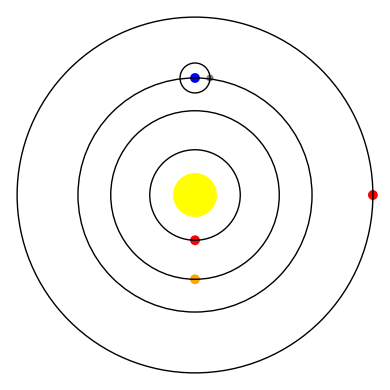

In [88]:
syst_reduit() + init_syst_reduit(0)

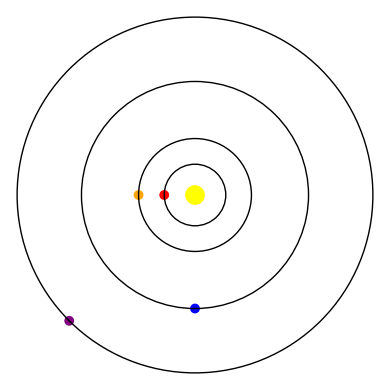

In [89]:
syst_ext() + init_syst_ext(0)

Animation with 100 frames
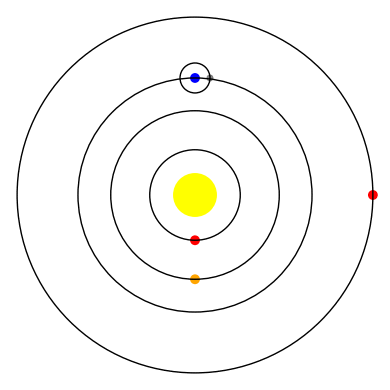

In [90]:
anim = [syst_reduit() + init_syst_reduit(n/100) for n in range(100)]
animate(anim).show()

Animation with 100 frames
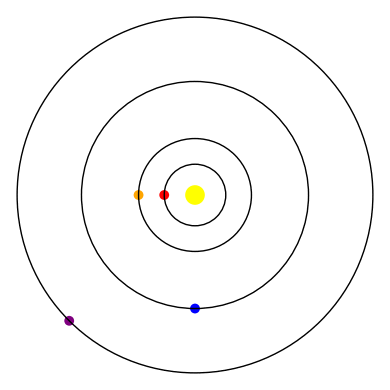

In [30]:
anim = [syst_ext() + init_syst_ext(n) for n in range(100)]
animate(anim).show()